In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [3]:
fmnist = tf.keras.datasets.fashion_mnist

In [4]:
(train_x, train_y), (test_x, test_y) = fmnist.load_data()

In [5]:
train_x = train_x.reshape(60000, 28, 28, 1)/255.0

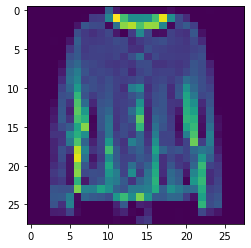

In [6]:
plt.imshow(test_x[25])

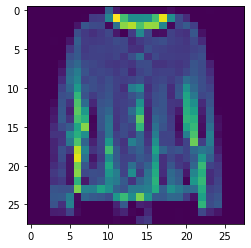

In [7]:
plt.imshow(test_x[25]/255.0)

In [8]:
test_x = test_x.reshape(10000, 28, 28, 1)/255.0

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.build()

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [13]:
model.fit(train_x, train_y, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.4457 - accuracy: 0.8382
Epoch 2/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2957 - accuracy: 0.8915
Epoch 3/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2507 - accuracy: 0.9080
Epoch 4/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2183 - accuracy: 0.9185
Epoch 5/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.1900 - accuracy: 0.9295


In [14]:
model.evaluate(test_x, test_y)

10000/10000 [==============================] - 1s 67us/sample - loss: 0.2543 - accuracy: 0.9053


[0.25425424256920814, 0.9053]